#Backpropagation

In [1]:
import numpy as np
import cv2
import pandas as pd
from sklearn.metrics import accuracy_score
from lib.ReadFiles import read_csv
from lib.FaceDetection import find_faces
from lib.Prepocessing import image_equalizer
from lib.plot import *
def reshape_dataset(X, y):
    images = [np.array(dx) for dx in X]
    images = np.asarray(images, dtype=np.uint8)
    labels = np.array(y).tolist()
    return images, labels
	
emotions = ["Marah", "Jijik", "Takut",
            "Senang", "Sedih", "Terkejut", "Biasa saja"]  # inisialisasi index dan emosi

In [2]:
_x, _y, _u = read_csv("input/fer2013_small.csv")
print(np.array(_x).shape)

x_new, y_new, u_new = [], [], []
for i, pixel in enumerate(_x):
	for norm, (x,y,w,h) in find_faces(np.array(pixel, dtype=np.uint8).reshape(48, 48)):
		if norm.size >0:
			x_new.append(pixel)
			y_new.append(_y[i])
			u_new.append(_u[i])
print(np.array(x_new).shape)

x_, y_ = image_equalizer(x_new, y_new)

(3815, 2304)
(1868, 2304)


In [3]:

dataframe = pd.DataFrame({"emotion": y_, "pixels": x_, "usage": u_new})

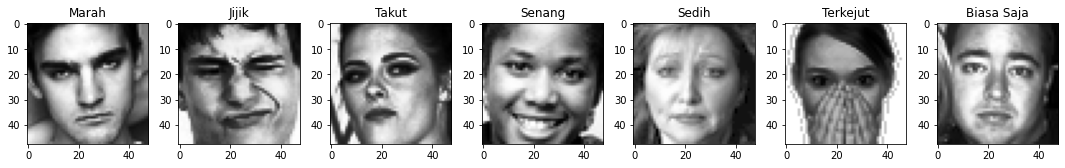

In [4]:
_x_test, _y_test = dataframe.loc[dataframe["usage"].str.endswith("Test") ,"pixels"], dataframe.loc[dataframe["usage"].str.endswith("Test"), "emotion"]
x_test, y_test = reshape_dataset(_x_test, _y_test)
plot_figure(x_test, y_test)

In [5]:
# membaca model dari trainig fihserface
import joblib
fisher = joblib.load("model/fisherface_training.pkl")

0.2742382271468144


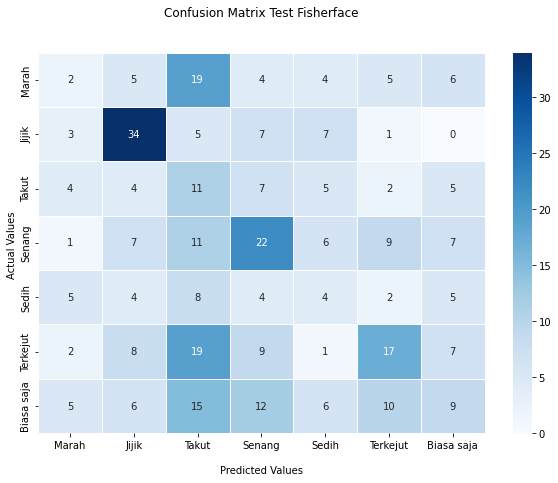

In [6]:
f_pred = []
f_extract = []
for i in range(len(x_test)):
	_p = fisher.predict(x_test[i]) #prediksi fisherface
	_q = fisher.extract(x_test[i]) #ekstrasi fitur fisherface
	f_pred.append(_p)
	f_extract.append(_q)

print(accuracy_score(y_test, f_pred))
cm_plot(y_test, f_pred, 'Test Fisherface', True)


In [7]:
from lib.Backpropagation import ModelBackprop

bpn = ModelBackprop(x = f_extract, y = y_test, n_hidden=128, lr=0.25, path='model/backprop_test.h5')

Num GPUs Available:  0


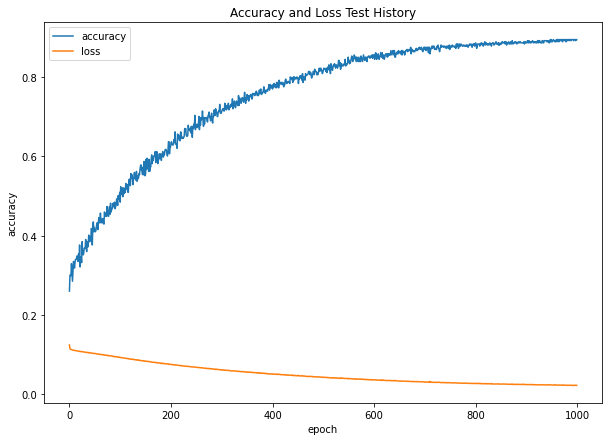

In [8]:
history_plot(bpn.history, 'Test History', False)

In [9]:
from lib.Backpropagation import normalize_data
f_ex, y_ex = normalize_data(f_extract ,y_test)
(loss,accuracy) = bpn.model.evaluate(f_ex ,y_ex, verbose=0)
print(accuracy*100)

89.47368264198303


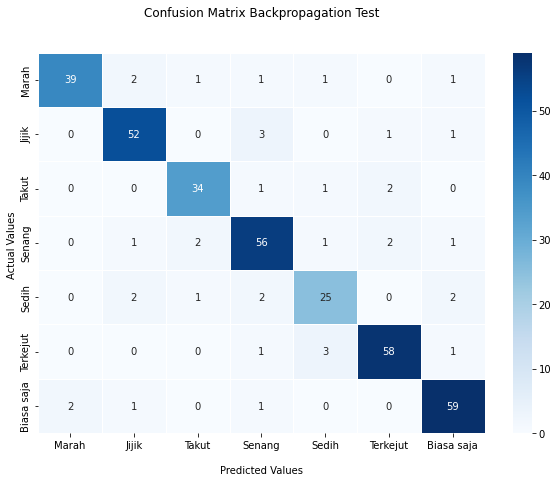

In [10]:
predict = bpn.predict(f_ex)
cm_plot(y_test, np.argmax(predict, axis=1), 'Backpropagation Test', False)